In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
import time

In [4]:
dataset=pd.read_csv('face_mimic_df.csv') #importing dataset
dataset                                  #printing dataset

,Unnamed: 0,id,age,gender,diagnosed,AU_01_t12,AU_06_t12,AU_12_t12,AU_04_t13,AU_07_t13,AU_09_t13,AU_01_t14,AU_02_t14,AU_04_t14
0,0,2019-09-25T18-51-06-885Z26,65.0,1,1,0.079102,0.252395,0.482137,0.216193,0.074656,0.005104,0.276285,0.103460,1.463085
1,1,2019-10-02T00-47-55-382Z3,57.0,1,1,0.059371,0.086916,0.147827,0.321326,0.100838,0.015806,0.339573,0.034221,0.327894
2,2,2019-10-03T13-13-40-042Z56,51.0,1,0,0.228496,0.517799,0.077302,0.023963,0.008114,0.009518,0.249356,0.187397,0.123984
3,3,2019-10-05T02-22-14-207Z34,72.0,1,1,0.058291,0.077728,0.170557,0.243995,0.012674,0.108509,1.021001,1.738898,0.254853
4,4,2019-10-05T14-19-59-179Z31,86.0,0,0,0.008417,0.215586,0.103639,0.081530,0.192569,0.007118,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,2020-04-18T17-29-39-337Z43,74.0,1,0,0.467770,0.058379,0.137685,0.226604,0.000440,0.001634,0.042374,0.001818,0.353959
513,513,2020-04-18T17-33-39-585Z56,67.0,0,1,0.005744,0.032865,0.189778,0.057712,0.212300,0.013286,0.309719,0.086577,0.000581
514,514,2020-04-18T21-15-17-924Z84,59.0,0,0,0.027014,0.557507,0.234040,0.976259,0.689190,0.030017,0.094675,0.070691,0.783146
515,515,2020-04-19T15-14-28-684Z91,64.0,0,0,0.021722,0.162771,0.905485,0.197712,0.198037,0.112724,0.059400,0.163631,1.268910


In [8]:
data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
and_t = pd.DataFrame(data,columns=['A','B','Z'])
and_t

,A,B,Z
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [9]:
data = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_t = pd.DataFrame(data,columns=['A','B','Z'])
xor_t

,A,B,Z
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [15]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [12]:
def summation_unit(x1,x2,w0,w1,w2):
  return (w0)+(x1*w1)+(x2*w2)

In [13]:
def summation_data(x0,x1,x2,w0,w1,w2):
  return (x0*w0)+(x1*w1)+(x2*w2)

In [17]:
def bipolar_function(x):
  if x>0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [20]:
def relu(x):
  if x>0:
    return x
  else:
    return 0


Epoch count: 18


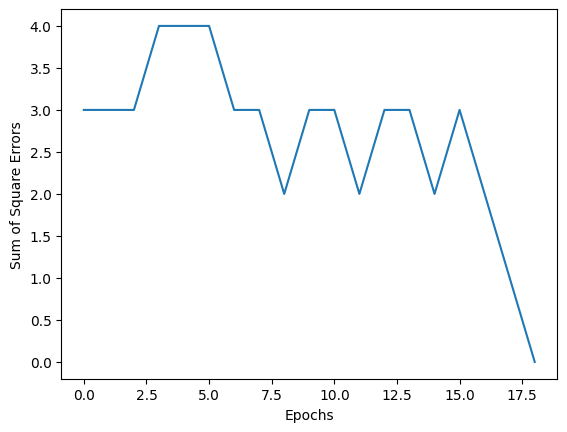

weights ==> w0 :  -1.5  w1 :  1.2  w2 :  0.75
calculated output :  0
real output :  0
calculated output :  0
real output :  0
calculated output :  0
real output :  0
calculated output :  1
real output :  1


In [24]:

w0 = 10
w1 = 0.2
w2 = -0.75

learning_rate = 0.5

epoch_count = 0
# Initialize lists to store epoch and error values
epochs = []
sum_square_errors = []

# Training loop
for epoch in range(100):
    error = 0
    for index, row in And_table.iterrows():
        a, b, result = row['A'], row['B'], row['result']
        prediction = step_function(summation_unit(a, b, w0, w1, w2))
        e = result - prediction
        w0 += learning_rate * e
        w1 += learning_rate * e * a
        w2 += learning_rate * e * b
        error += e ** 2
    epochs.append(epoch)
    sum_square_errors.append(error)
    if error < 0.002:
        print("Epoch count:", epoch)
        break

# Plotting the error
plt.plot(epochs, sum_square_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Square Errors')
plt.show()
print("weights ==> w0 : ",w0," w1 : ",w1," w2 : ",w2)
for index,row in  And_table.iterrows():
  print("calculated output : ",step_function(summation_unit(row['A'],row['B'],w0,w1,w2)))
  print("real output : ",row['result'])
